In [1]:
from FinancialMachineLearning.generator.stochasticprocess import *

In [127]:
stochastic = PradoSyntheticProcess(n_features = 10, n_informative = 2, n_redundant = 3, n_samples = 1000)

In [128]:
simulation = stochastic.simulate()

In [129]:
simulation = simulation.mean(axis = 1)

<Axes: >

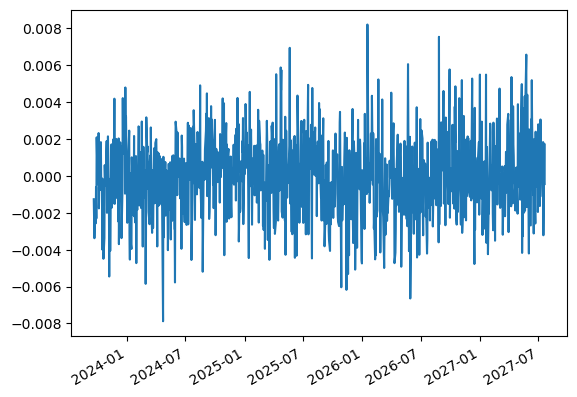

In [134]:
simulation.plot()

In [131]:
from FinancialMachineLearning.features.entropy import *
cont_etp = ContinuousEntropy(ret = np.log(simulation[10:]).diff().dropna(), period = 50)

/Users/junghunlee/anaconda3/envs/FinancialMachineLearning/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [132]:
apen = cont_etp.continuous_entropy()

<Axes: >

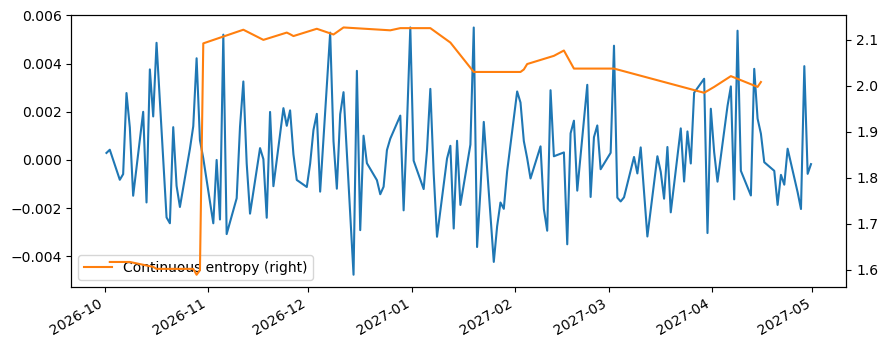

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(simulation.loc['2026-10' : '2027-04'])
apen.loc['2026-10' : '2027-04'].plot(secondary_y = True, ax = ax)
